In [1]:
from numpy import random as rand 
import tensorflow as tf 
import numpy as np
import os
from PIL import Image
 
class prep():

    #Import
    def fetch_imgs(self):

        true_list =  os.listdir(self.true_path)
        false_list = os.listdir(self.false_path)
        
        self.raw_true = []
        self.raw_false = []
        
        for img in true_list:
            self.raw_true.append(np.array(Image.open(self.true_path + '/' + img)))
        
        for img in false_list:
            self.raw_false.append(np.array(Image.open(self.false_path + '/' + img)))

        #Import raw images

        self.arr_true = self.resize(self.raw_true)
        self.arr_false = self.resize(self.raw_false)

    #Resize   
    def resize(self, imgs, shape = [300, 300]):

        r_imgs_list = []

        for img in imgs:       

            X = tf.placeholder(tf.float32, shape = [None, None, 3])

            X_resized = tf.image.resize_images(X, size = shape)

            with tf.Session() as sess:
                r_imgs_list.append(sess.run(X_resized, feed_dict = {X : img}))
        
        return np.array(r_imgs_list)

    #Save

    #Flush
    def flush(self, raw = False, processed = False):
        if raw :
            self.raw_true = None
            self.raw_false = None
        if processed :
            self.arr_true = None
            self.arr_false = None

    #Init
    def __init__(self, dat_folder, true_folder, false_folder):
        
        self.dat_path = os.path.abspath(dat_folder)
        self.true_path = os.path.abspath(dat_folder + '/' + true_folder)
        self.false_path = os.path.abspath(dat_folder + '/' + true_folder)
        
        self.fetch_imgs()

In [2]:
X = prep('Dataset', 'dat_true', 'dat_false/city')
X.fetch_imgs()
X.dat_path

'/home/l3th4l/Documents/Projects/GAN/Dataset'

In [4]:
from matplotlib import pyplot as plt
plt.imshow(X.arr_true[18]/255)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


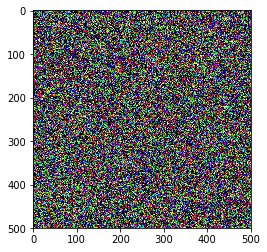

In [15]:
from keras.layers import Activation, Dense, Conv2D, Conv2DTranspose, Input, BatchNormalization, Flatten
from keras.models import Sequential
from keras import Model
from keras import backend as K 
import numpy as np 

class models():

    def generator(self):

        self.gen_net = Sequential()
        
        #Conv2d
        self.gen_net.add(Conv2D(filters = 32, kernel_size = 5, padding = 'valid'))
        #Batch Norm
        self.gen_net.add(BatchNormalization())
        #Relu
        self.gen_net.add(Activation(activation = 'relu'))
        
        #Conv2d
        self.gen_net.add(Conv2D(filters = 64, kernel_size = 5, padding = 'valid'))
        #Batch Norm
        self.gen_net.add(BatchNormalization())
        #Relu
        self.gen_net.add(Activation(activation = 'relu'))
        
        #Conv2d
        self.gen_net.add(Conv2D(filters = 128, kernel_size = 5, padding = 'valid'))
        #Batch Norm
        self.gen_net.add(BatchNormalization())
        #Relu
        self.gen_net.add(Activation(activation = 'relu'))
        
        #Conv2d
        self.gen_net.add(Conv2D(filters = 256, kernel_size = 5, padding = 'valid'))
        #Batch Norm
        self.gen_net.add(BatchNormalization())
        #Relu
        self.gen_net.add(Activation(activation = 'relu'))
        
        #T_Conv2d
        self.gen_net.add(Conv2DTranspose(filters = 128, kernel_size = 5, padding = 'valid'))
        #Batch Norm
        self.gen_net.add(BatchNormalization())
        #Relu
        self.gen_net.add(Activation(activation = 'relu'))

        #T_Conv2d
        self.gen_net.add(Conv2DTranspose(filters = 64, kernel_size = 5, padding = 'valid'))
        #Batch Norm
        self.gen_net.add(BatchNormalization())
        #Relu
        self.gen_net.add(Activation(activation = 'relu'))

        #T_Conv2d
        self.gen_net.add(Conv2DTranspose(filters = 32, kernel_size = 5, padding = 'valid'))
        #Batch Norm
        self.gen_net.add(BatchNormalization())
        #Relu
        self.gen_net.add(Activation(activation = 'relu'))

        #T_Conv2d
        self.gen_net.add(Conv2DTranspose(filters = 3, kernel_size = 5, padding = 'valid'))
        #Batch Norm
        self.gen_net.add(BatchNormalization())
        #Relu
        self.gen_net.add(Activation(activation = 'tanh'))
    
    def discriminator(self):
        
        self.disc_net = Sequential()
        
        self.disc_net.add(Conv2D(filters = 8, kernel_size = 5, padding = 'valid'))
        self.disc_net.add(BatchNormalization())
        self.disc_net.add(Activation(activation = 'relu'))

        self.disc_net.add(Conv2D(filters = 16, kernel_size = 5, padding = 'valid'))
        self.disc_net.add(BatchNormalization())
        self.disc_net.add(Activation(activation = 'relu'))

        self.disc_net.add(Conv2D(filters = 32, kernel_size = 7, padding = 'valid'))
        self.disc_net.add(BatchNormalization())
        self.disc_net.add(Activation(activation = 'relu'))

        self.disc_net.add(Conv2D(filters = 64, kernel_size = 7, padding = 'valid'))
        self.disc_net.add(BatchNormalization())
        self.disc_net.add(Activation(activation = 'relu'))

        #Flatten
        self.disc_net.add(Flatten())
        #FC layer 
        self.disc_net.add(Dense(1, activation = 'sigmoid'))




    def __init__(self, img_shape):

        self.img_shape = img_shape
        self.generator()
        self.discriminator()

X  = models(500)
a = np.random.normal(size = [3, 500, 500, 3])

X.disc_net.predict(a)
plt.imshow(a[1])

In [18]:
g = X.gen_net.predict(a)
print(g.shape)
plt.imshow(g[1]*100)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(3, 500, 500, 3)


In [19]:
p = np.random.normal(size = [20,10,10,3])
a_p = p[np.random.randint(2, size = 5)]

In [22]:
a_p.shape

(5, 10, 10, 3)